In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/dog-smiling.png")
image = cv2.resize(image,(200,200),interpolation=cv2.INTER_AREA)


def show(edges):
  border = 2
  out1 = cv2.copyMakeBorder(image,border,border,border,border,cv2.BORDER_CONSTANT,value=(0,0,0))
  out2 = cv2.copyMakeBorder(edges,border,border,border,border,cv2.BORDER_CONSTANT,value=(0,0,0))

  row = np.hstack((out1,out2))
  cv2_imshow(row)

**Corner detection**

Corner (گوشه): نقطه‌ای در تصویر که شدت تصویر در چندین جهت به طور ناگهانی تغییر می‌کند.

به زبان ساده: جایی که دو لبه به هم می‌رسند → گوشه است.

تفاوت با لبه:

لبه: تغییر شدت در یک جهت

گوشه: تغییر شدت در چند جهت



گوشه‌ها نقاط مشخص و پایدار هستند → برای تشخیص اشیا، ردیابی حرکت، ثبت تصویر و بازسازی سه‌بعدی استفاده می‌شوند.

**Harris Corner Detection**

ایده اصلی: بررسی تغییر شدت در یک پنجره کوچک در اطراف هر پیکسل.

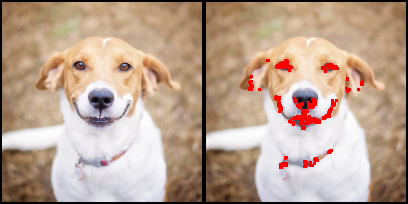

In [21]:
# convert image to gray one

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# convert to float32
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k = 0.04)
# ksize = 3 -> sobel

dst = cv2.dilate(dst, None)

img_harris = image.copy()
img_harris[dst > 0.01*dst.max()] = [0,0,255]

show(img_harris)

**Shi-Tomasi**

پایدارتر و برای ردیابی گوشه‌ها در ویدیو مناسب است.




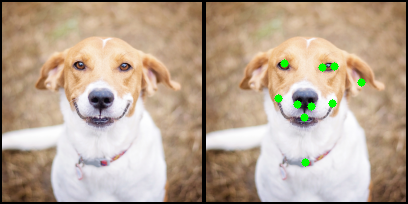

In [29]:
img_shi = image.copy()
corners = cv2.goodFeaturesToTrack(gray, maxCorners=10, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_shi, (x,y), 4, (0,255,0), -1)

show(img_shi)